# UNDESTANDING DBSCAN WITH TARGET STORE DATASET

**Content**

This dataset includes a record for Target location currently in operation as of April 2017. Columns include location data (address, Lat/Lon), store open date, last remodel date, capabilities (integrated Starbucks, CVS, etc.) and several other interesting data points.

Notebook reference - https://medium.com/@kyleake/density-based-spatial-clustering-of-applications-with-noise-dbscan-on-target-store-locations-18540c1f6cb7

Data - https://www.kaggle.com/ben1989/target-store-dataset

### READ DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('8.target.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,X.locale,Address.AddressLine1,Address.AddressLine2,Address.City,Address.CountryName,Address.County,Address.FormattedAddress,Address.IntersectionDescription,Address.Latitude,Address.Longitude,...,Is24Hours.Sat,IsOpen.Sat,Summary.Sat,ThruTime.Sat,BeginTime.Sun,Is24Hours.Sun,IsOpen.Sun,Summary.Sun,ThruTime.Sun,AllCapability
0,en-US,400 Oxford Exchange Blvd,NaN,Oxford,United States,Calhoun,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",SEC I-20 & Golden Creek Rd,33.608825,-85.783182,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star..."
1,en-US,2640 Enterprise Dr,NaN,Opelika,United States,Lee,"2640 Enterprise Dr, Opelika, AL 36801-1511",NWC I-85 & Hwy 280,32.618108,-85.410636,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
2,en-US,1129 S Park St,NaN,Carrollton,United States,Carroll,"1129 S Park St, Carrollton, GA 30117-4429",NWC US 27 & Hwy 166 Bypass,33.558920,-85.076473,...,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-9:00 p.m.,21:00:00,NaN
3,en-US,555 Bullsboro Dr,NaN,Newnan,United States,Coweta,"555 Bullsboro Dr, Newnan, GA 30265-1045",SWC I-85 & Rte 34,33.392907,-84.758875,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob..."
4,en-US,1591 Bradley Park Dr,NaN,Columbus,United States,Muscogee,"1591 Bradley Park Dr, Columbus, GA 31904-3071",NEC Bradley Pk & JR Allen Pkwy,32.534649,-84.971073,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot..."


In [4]:
df.shape

(1829, 47)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X.locale                             1829 non-null   object 
 1   Address.AddressLine1                 1829 non-null   object 
 2   Address.AddressLine2                 58 non-null     object 
 3   Address.City                         1829 non-null   object 
 4   Address.CountryName                  1829 non-null   object 
 5   Address.County                       1828 non-null   object 
 6   Address.FormattedAddress             1829 non-null   object 
 7   Address.IntersectionDescription      1828 non-null   object 
 8   Address.Latitude                     1829 non-null   float64
 9   Address.Longitude                    1829 non-null   float64
 10  Address.PostalCode                   1829 non-null   object 
 11  Address.Subdivision           

In [6]:
df.describe()

,Address.Latitude,Address.Longitude,ID,Store.StoreDistrictID,Store.StoreGroupID,Store.StoreRegionID,TimeZone.TimeZoneOffset.OffsetHours
count,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000
mean,37.618538,-93.586666,1571.299617,280.720612,335.435210,241.060689,-6.057408
std,5.203413,16.684875,776.198631,114.767723,111.974392,111.598546,1.164992
min,19.648413,-158.092822,3.000000,101.000000,190.000000,100.000000,-10.000000
25%,33.853038,-106.077670,993.000000,172.000000,197.000000,100.000000,-7.000000
50%,38.579381,-88.200911,1484.000000,302.000000,390.000000,300.000000,-6.000000
75%,41.561322,-80.599357,2191.000000,372.000000,395.000000,300.000000,-5.000000
max,61.578202,-68.741560,3295.000000,470.000000,499.000000,400.000000,-5.000000


For this problem, we will use only 'Address.Latitude' and 'Address.Longitude' columns to clustering. So let's retain only those columns.

In [7]:
# choose columns
df = df[['Name', 'Address.Latitude', 'Address.Longitude']]
df = df.set_index('Name')
df.head()

,Address.Latitude,Address.Longitude
Name,,
Oxford,33.608825,-85.783182
Opelika,32.618108,-85.410636
Carrollton,33.558920,-85.076473
Newnan,33.392907,-84.758875
Columbus,32.534649,-84.971073


In [8]:
coords = df.values

In [9]:
#100 km
kms_per_radian = 6371.0088
epsilon = 100 / kms_per_radian
epsilon

0.015696101377226164

In [10]:
db = DBSCAN(eps = 0.3,
             min_samples = 3,
             algorithm = 'ball_tree',
             metric = 'haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))

In [11]:
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
num_clusters

3

In [13]:
#Create new column for cluster labels
df['DBSCAN_labels'] = cluster_labels

In [14]:
df.head()

,Address.Latitude,Address.Longitude,DBSCAN_labels
Name,,,
Oxford,33.608825,-85.783182,0
Opelika,32.618108,-85.410636,0
Carrollton,33.558920,-85.076473,0
Newnan,33.392907,-84.758875,0
Columbus,32.534649,-84.971073,0


In [15]:
df['DBSCAN_labels'].value_counts().sort_index(inplace=True)

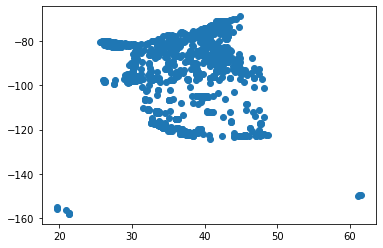

In [16]:
plt.scatter(df['Address.Latitude'], df['Address.Longitude'])
plt.show()

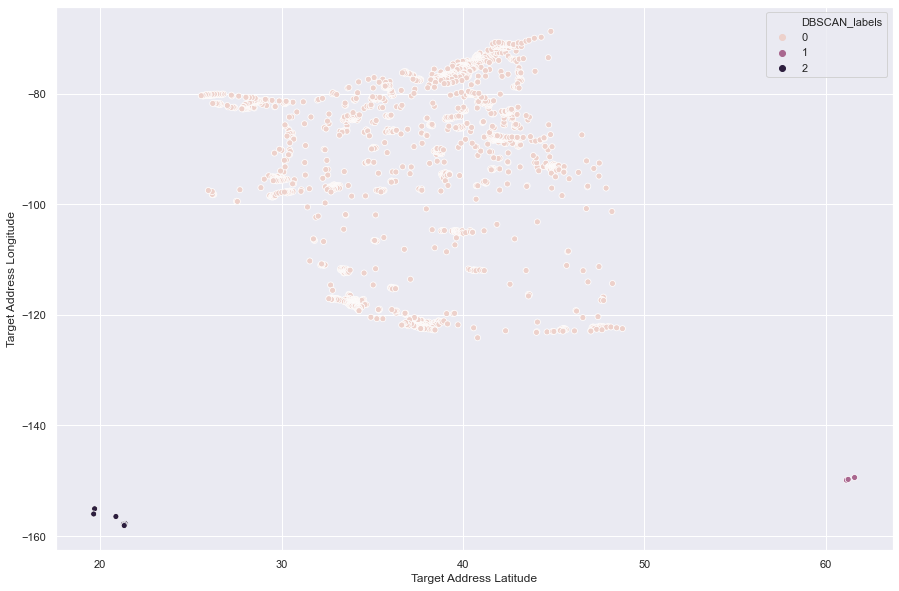

In [17]:
import seaborn as sns; sns.set()
plt.figure(figsize = (15, 10))
ax = sns.scatterplot(x="Address.Latitude", 
                     y="Address.Longitude", 
                     hue="DBSCAN_labels",
                     data=df)
plt.xlabel('Target Address Latitude')
plt.ylabel('Target Address Longitude')
ax

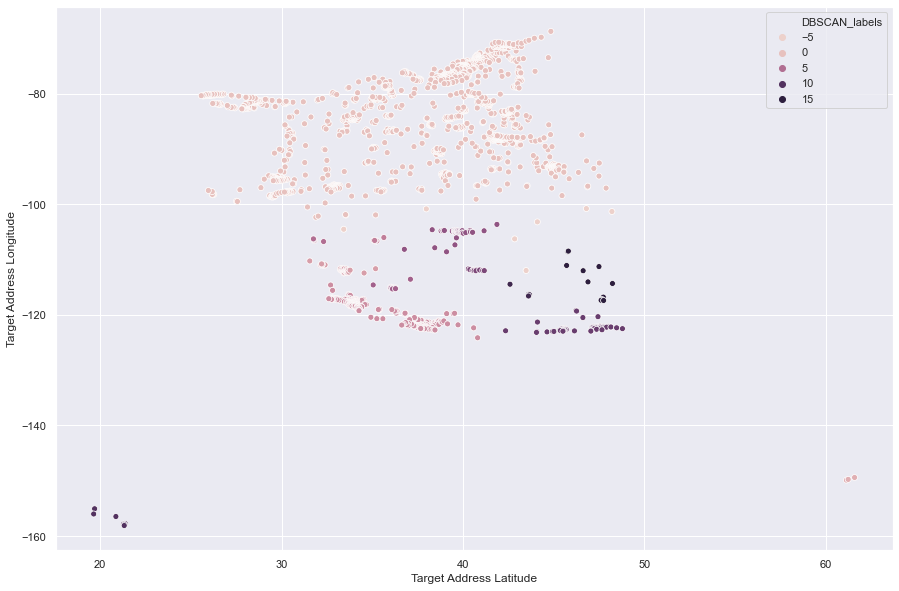

In [18]:
#200 km
kms_per_radian = 6371.0088
epsilon = 200 / kms_per_radian

db = DBSCAN(eps = epsilon,
             min_samples = 3,
             algorithm = 'ball_tree',
             metric = 'haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))

df['DBSCAN_labels'] = cluster_labels

import seaborn as sns; sns.set()
plt.figure(figsize = (15, 10))
ax = sns.scatterplot(x="Address.Latitude", 
                     y="Address.Longitude", 
                     hue="DBSCAN_labels",
                     data=df)
plt.xlabel('Target Address Latitude')
plt.ylabel('Target Address Longitude')
ax

In [19]:
df['DBSCAN_labels'].value_counts().sort_index()

-1        7
 0     1326
 1        3
 2       45
 3      289
 4        7
 5        5
 6       16
 7       44
 8       12
 9       53
 10       7
 11       4
 12      11
Name: DBSCAN_labels, dtype: int64

In [20]:
epsilon

0.03139220275445233

In [21]:
num_clusters

14